# Prepare

In [1]:
# Link to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Pkg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.2 MB/s eta 0:00:00


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/My Drive/INF2178/A4/INF2178_A4_data.csv')

# Data Process and EDA

In [4]:
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [6]:
selected_columns = ['Group', 'M/F', 'Visit', 'Subject ID', 'MMSE']
df_selected = df[selected_columns]
df_selected.isnull().sum()


Group         0
M/F           0
Visit         0
Subject ID    0
MMSE          1
dtype: int64

In [7]:
df_selected = df_selected.dropna(subset=['MMSE'])
df_selected.head()

,Group,M/F,Visit,Subject ID,MMSE
0,Nondemented,M,1,OAS2_0001,27.0
1,Nondemented,M,2,OAS2_0001,30.0
2,Demented,M,1,OAS2_0002,23.0
3,Demented,M,2,OAS2_0002,28.0
4,Nondemented,F,1,OAS2_0004,28.0


In [8]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Group       293 non-null    object 
 1   M/F         293 non-null    object 
 2   Visit       293 non-null    int64  
 3   Subject ID  293 non-null    object 
 4   MMSE        293 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.7+ KB


Text(0.5, 1.0, 'MMSE Scores by Number of Visit')

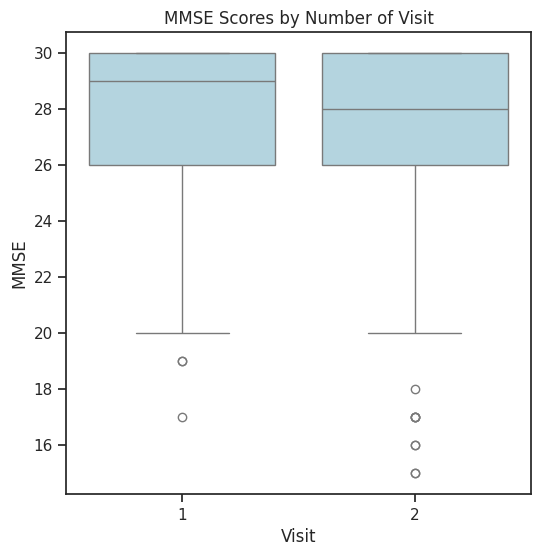

In [9]:
sns.set(style="ticks")

# MMSE vs Visit
plt.figure(figsize=(6, 6))
sns.boxplot(x='Visit', y='MMSE', data=df_selected, color = 'lightblue')
plt.title('MMSE Scores by Number of Visit')



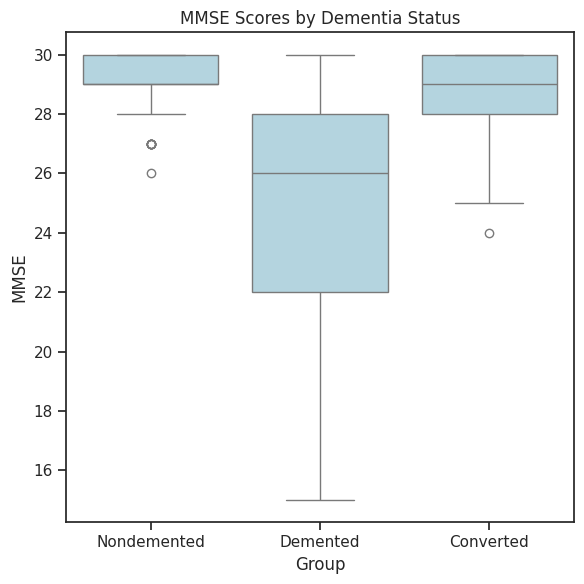

In [10]:
# MMSE vs Group

sns.set(style="ticks")
plt.figure(figsize=(6, 6))
sns.boxplot(x='Group', y='MMSE', data=df_selected, color = 'lightblue')
plt.title('MMSE Scores by Dementia Status')

plt.tight_layout()
plt.show()

<ipython-input-11-f9220a6a171d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Demented, bins=bins, label='Demented', color="blue")
<ipython-input-11-f9220a6a171d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Nondemented, bins=bins, label='Nondemented', color="lightgreen")
<ipython-input

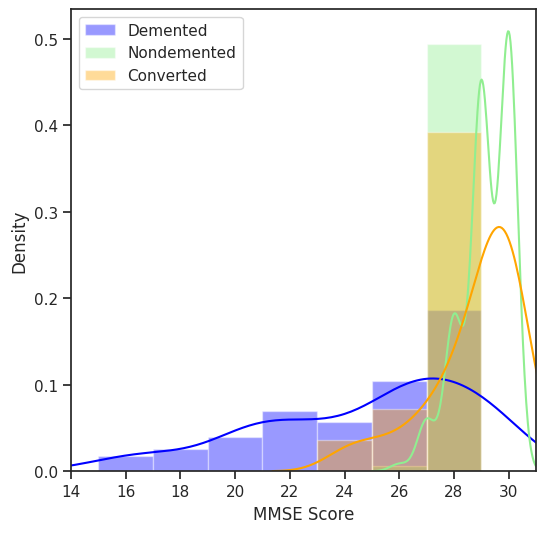

In [11]:
sns.set(style="ticks")

# bin
bins = np.arange(df_selected['MMSE'].min(), df_selected['MMSE'].max() + 1, 2)

Demented = df_selected[df_selected['Group'] == 'Demented']['MMSE'].values
Nondemented = df_selected[df_selected['Group'] == 'Nondemented']['MMSE'].values
Converted = df_selected[df_selected['Group'] == 'Converted']['MMSE'].values

# Displot
plt.figure(figsize=(6, 6))
sns.distplot(Demented, bins=bins, label='Demented', color="blue")
sns.distplot(Nondemented, bins=bins, label='Nondemented', color="lightgreen")
sns.distplot(Converted, bins=bins, label='Converted', color="orange")



# Title and label
plt.xlabel('MMSE Score')
plt.ylabel('Density')
plt.legend()


# xlim
plt.xlim([df_selected['MMSE'].min() - 1, df_selected['MMSE'].max() + 1])

plt.show()


<ipython-input-12-e903447201a0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Visit1, bins=bins, label='Visit1', color="blue")
<ipython-input-12-e903447201a0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Visit2, bins=bins, label='Visit2', color="lightgreen")


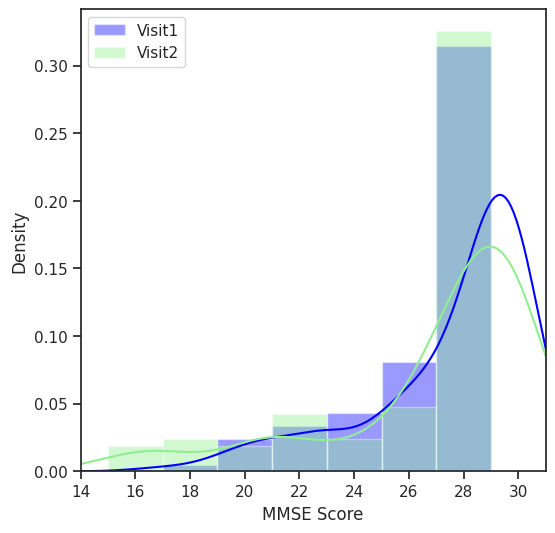

In [12]:
sns.set(style="ticks")

bins = np.arange(df_selected['MMSE'].min(), df_selected['MMSE'].max() + 1, 2)

Visit1 = df_selected[df_selected['Visit'] == 1 ]['MMSE'].values
Visit2 = df_selected[df_selected['Visit'] == 2 ]['MMSE'].values

# Distplot
plt.figure(figsize=(6, 6))
sns.distplot(Visit1, bins=bins, label='Visit1', color="blue")
sns.distplot(Visit2, bins=bins, label='Visit2', color="lightgreen")



# Title and label
plt.xlabel('MMSE Score')
plt.ylabel('Density')
plt.legend()


# xlim
plt.xlim([df_selected['MMSE'].min() - 1, df_selected['MMSE'].max() + 1])

plt.show()

# Research Question : Whether the group to which subjects belonged and the number of measurements had a main or mixed effect on MMSE.

<ipython-input-13-1f88f0dda548>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_selected, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'],


<Axes: xlabel='Group', ylabel='MMSE'>

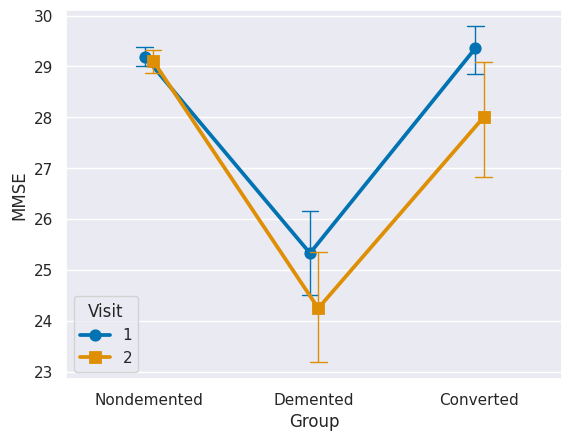

In [13]:
sns.set()
sns.pointplot(data=df_selected, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [14]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df_selected)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



In [15]:
# Post Hoc Test
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df_selected)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -        Converted  Demented     False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  1        Converted  Demented     False     True           8.012   60.516  two-sided        0.000       318700000.000

# Statistical Power

In [16]:
from statsmodels.stats.power import TTestIndPower
# Conducting a post-hoc power analysis
alpha = 0.05
power = 0.91
effect_size = 0.7

obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 45.451


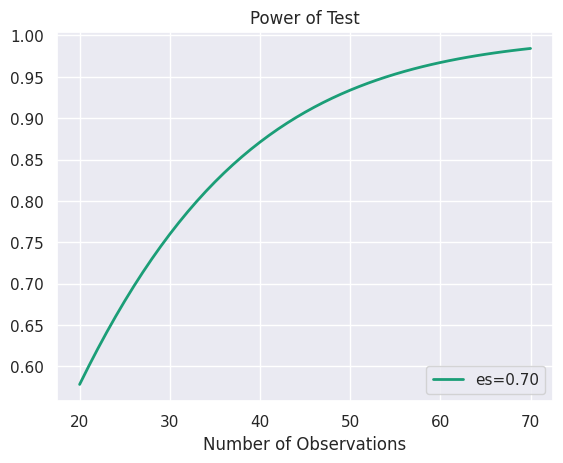

In [17]:
# Power curves
# Power analysis varying parameters
effect_size = 0.7
# Choose a range that extends both below and above the calculated sample size of approximately 45
# Here we start at 20 and go up to 70 in increments of 1
sample_sizes = np.array(range(20, 71))

# Plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=[effect_size])

plt.show()
